In [1]:
using ModelingToolkit, Sophon, DomainSets
using Optimization, OptimizationOptimJL

@parameters t
@variables u(..)
Dₜ = Differential(t)
ω = 0.01

eq = Dₜ(u(t))~cos(0.01*t)
bcs = [
    u(0)~0,
]

domain = [t∈-600..600]
@named ode = PDESystem(eq, bcs, domain, [t], [u(t)])

PDESystem
Equations: Equation[Differential(t)(u(t)) ~ cos(0.01t)]
Boundary Conditions: Equation[u(0) ~ 0]
Domain: Symbolics.VarDomainPairing[Symbolics.VarDomainPairing(t, -600..600)]
Dependent Variables: Num[u(t)]
Independent Variables: Num[t]
Parameters: SciMLBase.NullParameters()
Default Parameter ValuesDict{Any, Any}()

In [2]:
sampler = QuasiRandomSampler(1000, 1)
pinn = PINN(Siren(1,16,16,16,16,1; omega=0.01f0))
strategy = NonAdaptiveTraining(1, 50)

prob = Sophon.discretize(ode, pinn, sampler, strategy)

OptimizationProblem. In-place: true
u0: ComponentVector{Float64}(layer_1 = (weight = [0.002697080373764038; -0.009475725702941418; … ; 6.007551928632893e-5; 0.005619778297841549;;], bias = [0.0; 0.0; … ; 0.0; 0.0;;]), layer_2 = (weight = [0.5644921660423279 -0.5170191526412964 … 0.1521855592727661 0.2215651422739029; -0.47357550263404846 0.34990063309669495 … -0.26299992203712463 -0.31563976407051086; … ; -0.5382025241851807 -0.0013928491389378905 … 0.022067314013838768 -0.22288498282432556; -0.48909905552864075 0.284065306186676 … 0.1294878125190735 -0.2591482698917389], bias = [0.0; 0.0; … ; 0.0; 0.0;;]), layer_3 = (weight = [-0.3126019835472107 0.3422688841819763 … -0.5054457783699036 -0.29168736934661865; -0.47509077191352844 0.5310904383659363 … 0.5437829494476318 -0.5511395931243896; … ; -0.45017358660697937 -0.2463662475347519 … -0.1712510883808136 -0.22401079535484314; 0.13801755011081696 0.06716284900903702 … 0.49868905544281006 0.5633015632629395], bias = [0.0; 0.0; … ; 0.0; 

In [3]:
function callback(p, l)
    println("Loss: $l")
    return false
end

res = Optimization.solve(prob, BFGS(); maxiters=2000, callback=callback)

Loss: 0.4797419829208991


Loss: 0.4728865969566627


Loss: 0.46611381888183034
Loss: 0.46560118350715063


Loss: 0.46443802828731734
Loss: 0.4633316620547564
Loss: 0.462915383632409


Loss: 0.4626338370887731
Loss: 0.4618240584538558


Loss: 0.46161684826520305
Loss: 0.46117698507532956


Loss: 0.46072901876686345
Loss: 0.46059646235999857
Loss: 0.4602164385857959


Loss: 0.45986859469451774
Loss: 0.45977140995168014


Loss: 0.45966909748586143
Loss: 0.4592711450242294
Loss: 0.4571798190566863


Loss: 0.45536142842294264
Loss: 0.45441718529658237
Loss: 0.450539636559707
Loss: 0.4492076320262807
Loss: 0.44759414662298097
Loss: 0.4437086636699056


Loss: 0.4415087319703609
Loss: 0.4388513453957707
Loss: 0.43562733311923246
Loss: 0.43397665229371407
Loss: 0.43039514796153416


Loss: 0.4278267694862355
Loss: 0.4218125195833227
Loss: 0.4137307667059059


Loss: 0.4086903633178216
Loss: 0.4042059004906051
Loss: 0.398719385677717


Loss: 0.3939591830979944
Loss: 0.3920454269044545
Loss: 0.3818661555373346


Loss: 0.3798584302153054
Loss: 0.3768785862114042
Loss: 0.3709478368594862
Loss: 0.36916166136871187


Loss: 0.3674159578964118
Loss: 0.3656345619213641
Loss: 0.362879453132057


Loss: 0.359186223100911
Loss: 0.35682145903956325
Loss: 0.3545030088284908


Loss: 0.35319413589551607
Loss: 0.35001216024929604
Loss: 0.3487428646462324


Loss: 0.34724887912466207
Loss: 0.3452591333263135
Loss: 0.33187960654282245


Loss: 0.3310112701770388
Loss: 0.3236331023193073
Loss: 0.31920744678584223


Loss: 0.31841653322737395
Loss: 0.3133567982533148
Loss: 0.3106170195448547


Loss: 0.29514063446425415
Loss: 0.2906656563269151


Loss: 0.2871606164921638
Loss: 0.28579880430834353
Loss: 0.27737409084353054
Loss: 0.2759591430394486
Loss: 0.2720279058343168


Loss: 0.2681849530220722
Loss: 0.26663969286892225
Loss: 0.2610595981138801


Loss: 0.2560942850070391
Loss: 0.25352582848240784
Loss: 0.24822050870493104


Loss: 0.23600456870946396
Loss: 0.23545519284432911
Loss: 0.22656330525123095
Loss: 0.2247957018948977


Loss: 0.2232274109816043
Loss: 0.21294881306741772
Loss: 0.21252946321296853
Loss: 0.209822427076205
Loss: 0.20801047892877494


Loss: 0.2023484880760073
Loss: 0.19943802130161528
Loss: 0.19811899715843523
Loss: 0.1906164129867884


Loss: 0.18958461294667034
Loss: 0.18645103911129943
Loss: 0.18380134867900866
Loss: 0.17281688385404861


Loss: 0.17000424825205315
Loss: 0.16883948516686462
Loss: 0.16314845357573354


Loss: 0.1626798910735504
Loss: 0.15986791752328264


Loss: 0.15546553787400766
Loss: 0.15304540673066716
Loss: 0.15200161355742797


Loss: 0.1465427799954207
Loss: 0.1406458484454085
Loss: 0.13975741716069284


Loss: 0.13145531750089398
Loss: 0.12907476070929103


Loss: 0.1258818252159157
Loss: 0.1252739041748674
Loss: 0.12436475270310626


Loss: 0.1230871925290164
Loss: 0.11901500976807408


Loss: 0.11768246874073428
Loss: 0.1097467832610782


Loss: 0.10761245969068016
Loss: 0.10610455281261152
Loss: 0.10081816683488222


Loss: 0.10028030680829207
Loss: 0.09797127922974574
Loss: 0.09354547308252417


Loss: 0.0924395411164743
Loss: 0.09033157525155885
Loss: 0.08954759646234196


Loss: 0.08820098473971733
Loss: 0.08680186131889248
Loss: 0.08520065534137183


Loss: 0.08195833783697318
Loss: 0.07853937597159506
Loss: 0.07519124231870779


Loss: 0.07430096531557066
Loss: 0.07189232605075016


Loss: 0.07033641265289953
Loss: 0.06872227176074708
Loss: 0.06577797234982913


Loss: 0.06391349707294423
Loss: 0.06288175026284658


Loss: 0.06053527217622075
Loss: 0.05730139677496816


Loss: 0.05515410776140174
Loss: 0.05406291329018407


Loss: 0.05191530494036367
Loss: 0.050707845811725424
Loss: 0.049145532945454824
Loss: 0.045599129035880065


Loss: 0.04471200343096324
Loss: 0.04177760401308301
Loss: 0.04064887236769873


Loss: 0.03962338274828929
Loss: 0.033981872616445
Loss: 0.03366680433232417
Loss: 0.03264406484053961


Loss: 0.029863022682400868
Loss: 0.02825110865942374
Loss: 0.02728715115363099


Loss: 0.02564419794752095
Loss: 0.023382527085802303


Loss: 0.02224955070219268
Loss: 0.01995039152460671
Loss: 0.019588310112560778
Loss: 0.01738816846527107
Loss: 0.016971953168088486


Loss: 0.016336466522931678
Loss: 0.015954677974482717
Loss: 0.015254373749314303


Loss: 0.014850297031879674
Loss: 0.014005804139593299
Loss: 0.01361472206802966


Loss: 0.013063257598374966
Loss: 0.012766034843717066
Loss: 0.012176624640963621


Loss: 0.011820696985325707
Loss: 0.011637671435939098
Loss: 0.010681403256435438


Loss: 0.01056713595778407
Loss: 0.00972098265769241
Loss: 0.00942570283762172


Loss: 0.00885833977332015
Loss: 0.008567112215345155
Loss: 0.007822030875758544
Loss: 0.0076850429830595665


Loss: 0.00717656844549718
Loss: 0.0070100418393697845
Loss: 0.006692247474334962
Loss: 0.0062529114109520995


Loss: 0.005882977659820072
Loss: 0.005631832402072473


Loss: 0.005430696424700475
Loss: 0.005165624528002756
Loss: 0.005023629310714176


Loss: 0.00476260363181386
Loss: 0.004365480650005352
Loss: 0.004029195948480772


Loss: 0.0038514035514879805
Loss: 0.0034812181416374556
Loss: 0.0032915342981667613
Loss: 0.002962033304140104


Loss: 0.002798321989836079
Loss: 0.00240386648478951
Loss: 0.0022698384821228205
Loss: 0.0019698348781803827


Loss: 0.0018490171815356011
Loss: 0.0015881993309316519
Loss: 0.0015036900550432883
Loss: 0.0014418454017980063
Loss: 0.001215247484415573
Loss: 0.0011896363535121727
Loss: 0.0011673038215172528


Loss: 0.0009822198609424687
Loss: 0.0009311506259837054
Loss: 0.0007707040938512244
Loss: 0.0006554484452446557
Loss: 0.000620760246263487
Loss: 0.0005714418820914165


Loss: 0.0005308065121987404
Loss: 0.0004880163029778437
Loss: 0.0004014097855040958


Loss: 0.0003629327921575857
Loss: 0.0003483226919176797
Loss: 0.0002959307164946995
Loss: 0.00028361687485650705
Loss: 0.00024412997843029888
Loss: 0.00022917251067529495
Loss: 0.00021818988659842045


Loss: 0.00019286635532942689
Loss: 0.0001807778597897965
Loss: 0.00015821664364448537
Loss: 0.00015459094602195852
Loss: 0.0001439601879361488
Loss: 0.00012364066089482444
Loss: 0.0001155927182171369


Loss: 0.00010786713130974089
Loss: 0.00010208924356884107
Loss: 9.357597103961876e-5
Loss: 8.498617648044036e-5
Loss: 8.161023583609398e-5
Loss: 7.675236131938836e-5
Loss: 7.297348224113475e-5
Loss: 6.814881126020254e-5


Loss: 6.330176456576554e-5
Loss: 5.950736448823668e-5
Loss: 5.591406207611207e-5
Loss: 5.27179475988132e-5
Loss: 4.891195425100284e-5
Loss: 4.526542399226814e-5
Loss: 4.261245654576083e-5


Loss: 3.993311800263665e-5
Loss: 3.7258700578913534e-5
Loss: 3.596412826159468e-5
Loss: 3.433353015515609e-5
Loss: 3.227857197433574e-5
Loss: 3.076162830858319e-5
Loss: 2.993413942488648e-5


Loss: 2.9174603626256454e-5
Loss: 2.7890732887502018e-5
Loss: 2.6277475815583124e-5
Loss: 2.5197760910623226e-5
Loss: 2.450442509192188e-5
Loss: 2.314868267737696e-5
Loss: 2.197532190431319e-5


Loss: 2.0821681416232152e-5
Loss: 1.9399823058617502e-5
Loss: 1.8345909911573827e-5
Loss: 1.7501087614830105e-5
Loss: 1.6989155500833746e-5
Loss: 1.653340758177461e-5


Loss: 1.6081280032220557e-5
Loss: 1.553622861265386e-5
Loss: 1.5098689708478328e-5
Loss: 1.4845263552557691e-5
Loss: 1.443602621907994e-5
Loss: 1.3933781293179531e-5


Loss: 1.3191970768077276e-5
Loss: 1.241558810015089e-5
Loss: 1.1847387274593068e-5
Loss: 1.134349257731346e-5
Loss: 1.1111210162687127e-5
Loss: 1.0885246623467835e-5


Loss: 1.0641566779997481e-5
Loss: 1.0259235187972497e-5
Loss: 9.972348339476168e-6
Loss: 9.640561451704689e-6
Loss: 9.248296338955902e-6


Loss: 8.54154253404944e-6
Loss: 7.912981452174587e-6
Loss: 7.60353748562197e-6
Loss: 7.151806246803199e-6
Loss: 6.790161465324375e-6


Loss: 6.446008071527536e-6
Loss: 6.214461017254012e-6
Loss: 5.835678494172434e-6
Loss: 5.462622102523671e-6
Loss: 5.05979498892857e-6
Loss: 4.843253215592659e-6


Loss: 4.529956990898311e-6
Loss: 4.369932079068445e-6
Loss: 4.196157116055263e-6
Loss: 4.067659249808672e-6
Loss: 3.922282225081281e-6


Loss: 3.8126152887497102e-6
Loss: 3.6946656158918137e-6
Loss: 3.5789902377577985e-6
Loss: 3.4922699343953814e-6
Loss: 3.3471165577177875e-6


Loss: 3.1808811600048825e-6
Loss: 2.9034596223300672e-6
Loss: 2.6802126954024645e-6
Loss: 2.5594258988693113e-6
Loss: 2.456908963849395e-6


Loss: 2.3574902096763285e-6
Loss: 2.279737382734694e-6
Loss: 2.1918580375293666e-6
Loss: 2.0979628474227347e-6
Loss: 2.021758334475081e-6


Loss: 1.967942469340743e-6
Loss: 1.9279347211347035e-6
Loss: 1.8824952726428336e-6
Loss: 1.846621852663866e-6
Loss: 1.8099985955698966e-6


Loss: 1.783847684277652e-6
Loss: 1.7607717946122207e-6
Loss: 1.740662586081181e-6
Loss: 1.7161582919186699e-6


Loss: 1.6440921601055572e-6
Loss: 1.5447844275092493e-6
Loss: 1.486181962485328e-6
Loss: 1.4537831656333822e-6
Loss: 1.4350252742725485e-6


Loss: 1.4203548016511939e-6
Loss: 1.3883933710051041e-6
Loss: 1.300809189044329e-6
Loss: 1.1906474090301357e-6
Loss: 1.1265344252169001e-6


Loss: 1.0964560893723147e-6
Loss: 1.0848637941818719e-6
Loss: 1.0808278121169473e-6
Loss: 1.0742208514198109e-6
Loss: 1.063857198602628e-6


Loss: 1.0435925678950325e-6
Loss: 1.0171544740163492e-6
Loss: 9.989788060235758e-7
Loss: 9.913293623017728e-7
Loss: 9.849700240036829e-7


Loss: 9.772263581970072e-7
Loss: 9.617299140548944e-7
Loss: 9.336219825436216e-7
Loss: 9.08852220945612e-7
Loss: 8.97531797287284e-7


Loss: 8.926121253127246e-7
Loss: 8.875831842756119e-7
Loss: 8.733550281883127e-7
Loss: 8.476199114463179e-7


Loss: 8.407994708048396e-7
Loss: 8.383855701764626e-7
Loss: 8.337249940879589e-7
Loss: 8.233208257119177e-7
Loss: 8.078393708081224e-7


Loss: 7.94419409426112e-7
Loss: 7.842140913830226e-7
Loss: 7.77659323422506e-7
Loss: 7.724495127388709e-7


Loss: 7.674469014786933e-7
Loss: 7.624768616977103e-7
Loss: 7.581285087580324e-7
Loss: 7.489855116042091e-7
Loss: 7.127300190696455e-7


Loss: 6.449180178260308e-7
Loss: 6.078440603631337e-7
Loss: 5.772245913934629e-7
Loss: 5.611432950024135e-7
Loss: 5.578245127836401e-7
Loss: 5.55949041339813e-7


Loss: 5.549920460051547e-7
Loss: 5.530422945672769e-7
Loss: 5.496027690231537e-7
Loss: 5.393700716109878e-7
Loss: 5.203384373762933e-7


Loss: 5.054178741484534e-7
Loss: 4.983360490436537e-7
Loss: 4.942802721991676e-7
Loss: 4.917339448624144e-7
Loss: 4.906041609304234e-7
Loss: 4.884075785343104e-7


Loss: 4.789597072463358e-7
Loss: 4.587418767643747e-7
Loss: 4.4637589124362566e-7
Loss: 4.3679743190678185e-7
Loss: 4.2716017867420835e-7


Loss: 4.234631497167397e-7
Loss: 4.2263749227096074e-7
Loss: 4.219256249658929e-7
Loss: 4.198516172534889e-7


Loss: 4.1058259237216806e-7
Loss: 3.9492610509060866e-7
Loss: 3.8402063637344497e-7
Loss: 3.8244026125261415e-7
Loss: 3.81948935417075e-7
Loss: 3.8165950219246503e-7


Loss: 3.812994850108978e-7
Loss: 3.805616585282892e-7
Loss: 3.785736435245689e-7
Loss: 3.6654719545571336e-7
Loss: 3.465437750828345e-7


Loss: 3.312199993462118e-7
Loss: 3.1703911434848804e-7
Loss: 3.050567488186294e-7
Loss: 3.011015698804039e-7
Loss: 2.9931610886613605e-7
Loss: 2.977909558732019e-7


Loss: 2.97129170291505e-7
Loss: 2.9636804539770743e-7
Loss: 2.9548465424599683e-7
Loss: 2.9364366313641627e-7
Loss: 2.905986683179931e-7


Loss: 2.8669777837306595e-7
Loss: 2.802228051666711e-7
Loss: 2.7076669811966476e-7
Loss: 2.680401052217001e-7
Loss: 2.631012218396944e-7


Loss: 2.568973721038906e-7
Loss: 2.4382379846194756e-7
Loss: 2.3203586737312531e-7
Loss: 2.2221347693841956e-7
Loss: 2.1456430599616052e-7


Loss: 2.0591684527888102e-7
Loss: 1.9842055467057666e-7
Loss: 1.9076446159745191e-7
Loss: 1.8477717891886915e-7


Loss: 1.815394514261862e-7
Loss: 1.7987009506097452e-7
Loss: 1.792465809102468e-7
Loss: 1.78723708001228e-7


Loss: 1.7807884260176662e-7
Loss: 1.769276826531916e-7
Loss: 1.7546322595437832e-7
Loss: 1.7401015904184944e-7


Loss: 1.7225326395664354e-7
Loss: 1.7045508895312597e-7
Loss: 1.6799018663468184e-7
Loss: 1.6586342669730605e-7
Loss: 1.6278631370362027e-7
Loss: 1.5925914906265963e-7


Loss: 1.5472999329335685e-7
Loss: 1.5352290234094715e-7
Loss: 1.5106637020532238e-7
Loss: 1.4966778395005796e-7
Loss: 1.4817907722225709e-7


Loss: 1.4724602301565274e-7
Loss: 1.4647565292242396e-7
Loss: 1.4581512736593766e-7
Loss: 1.4480080157835004e-7


Loss: 1.4413529438574107e-7
Loss: 1.4392098985800543e-7
Loss: 1.4334030599119508e-7
Loss: 1.42813193339103e-7
Loss: 1.4220502608949343e-7


Loss: 1.4134619801239816e-7
Loss: 1.3979926886910534e-7
Loss: 1.37349501510583e-7
Loss: 1.3566588116161218e-7


Loss: 1.330705648586877e-7
Loss: 1.2845768932022333e-7
Loss: 1.247292574566766e-7
Loss: 1.22630812801036e-7


Loss: 1.210066539179814e-7
Loss: 1.1913258413008315e-7
Loss: 1.173747309659879e-7
Loss: 1.1645374780525509e-7
Loss: 1.1605233493524962e-7


Loss: 1.1572913275609679e-7
Loss: 1.1546240604221891e-7
Loss: 1.1524499745358622e-7
Loss: 1.1511725362296845e-7


Loss: 1.1503156913727203e-7
Loss: 1.1486948612953049e-7
Loss: 1.1459520779520508e-7
Loss: 1.1401663740729943e-7
Loss: 1.1290206010845074e-7


Loss: 1.1077267120819084e-7
Loss: 1.0816080609151382e-7
Loss: 1.0653763129716648e-7
Loss: 1.0475626582135533e-7
Loss: 1.0351881927515276e-7


Loss: 1.0296834095060287e-7
Loss: 1.0277025699744419e-7
Loss: 1.0262421698168418e-7
Loss: 1.0252380573456937e-7
Loss: 1.0232749772839325e-7


Loss: 1.0145721118912736e-7
Loss: 9.945803636843547e-8
Loss: 9.682448300412212e-8
Loss: 9.590255407426289e-8
Loss: 9.484788747506119e-8
Loss: 9.348325857874153e-8


Loss: 9.175748563452162e-8
Loss: 8.89862983572719e-8
Loss: 8.760009205242967e-8
Loss: 8.721433060639857e-8
Loss: 8.705261566468331e-8


Loss: 8.697728782297612e-8
Loss: 8.692859905445204e-8
Loss: 8.68533853777063e-8
Loss: 8.662951237181215e-8


Loss: 8.632197919471912e-8
Loss: 8.611432547296264e-8
Loss: 8.592927033460713e-8
Loss: 8.56900138316189e-8
Loss: 8.500824884423096e-8


Loss: 8.289129898479396e-8
Loss: 8.059846001661243e-8
Loss: 7.892585504895772e-8
Loss: 7.83030656721625e-8
Loss: 7.765084210923719e-8
Loss: 7.689016724143867e-8


Loss: 7.630404516123948e-8
Loss: 7.594822107865604e-8
Loss: 7.578205059065404e-8
Loss: 7.56956277135003e-8
Loss: 7.564608277224425e-8


Loss: 7.559987098329383e-8
Loss: 7.554829558450223e-8
Loss: 7.549860664389599e-8
Loss: 7.541632237194622e-8
Loss: 7.53151145797752e-8


Loss: 7.523296415305624e-8
Loss: 7.503290013777326e-8
Loss: 7.451733573262359e-8
Loss: 7.371623500042196e-8
Loss: 7.222816262069019e-8


Loss: 6.902500903361771e-8
Loss: 6.652747274897065e-8
Loss: 6.52915538869028e-8
Loss: 6.447064045465911e-8
Loss: 6.350489571891121e-8
Loss: 6.328124811273953e-8
Loss: 6.306351250019468e-8


Loss: 6.290171831682832e-8
Loss: 6.281637670006234e-8
Loss: 6.275903340629782e-8
Loss: 6.271383414805042e-8
Loss: 6.267242957560848e-8


Loss: 6.262385880935328e-8
Loss: 6.257219416098358e-8
Loss: 6.253848811551914e-8
Loss: 6.250541125280237e-8
Loss: 6.244735627527994e-8


Loss: 6.229286520938243e-8
Loss: 6.164199871884172e-8
Loss: 5.983487830262576e-8
Loss: 5.886201383671796e-8
Loss: 5.761580168529048e-8
Loss: 5.6744336438178875e-8


Loss: 5.5990902327810456e-8
Loss: 5.5452306196227726e-8
Loss: 5.4918313603042195e-8
Loss: 5.427466871312036e-8
Loss: 5.3810329723478513e-8
Loss: 5.342106082491931e-8


Loss: 5.2874993157238514e-8
Loss: 5.260175968786707e-8
Loss: 5.233835473828346e-8
Loss: 5.225587749279044e-8
Loss: 5.2156434330257246e-8
Loss: 5.2086185532512855e-8


Loss: 5.2036232455352794e-8
Loss: 5.201188886306434e-8
Loss: 5.197754859241143e-8
Loss: 5.1932637165491947e-8
Loss: 5.1901553957179295e-8


Loss: 5.185751135459861e-8
Loss: 5.176719240402968e-8
Loss: 5.155338251450146e-8
Loss: 5.1192881015295634e-8


Loss: 5.037548383626414e-8
Loss: 4.925218241165223e-8
Loss: 4.834644266372752e-8
Loss: 4.751518927487947e-8
Loss: 4.6801861306936546e-8
Loss: 4.569205866244004e-8
Loss: 4.456015755071974e-8


Loss: 4.303156957408412e-8
Loss: 4.218492149518436e-8
Loss: 4.1471111797825885e-8
Loss: 4.059758977598208e-8
Loss: 4.024076390435791e-8
Loss: 3.988773753393805e-8
Loss: 3.9651244360012416e-8


Loss: 3.941517697750208e-8
Loss: 3.925483253328264e-8
Loss: 3.902285768186805e-8
Loss: 3.8871678999082874e-8
Loss: 3.8784491767998175e-8
Loss: 3.87132242949476e-8
Loss: 3.8664901305683775e-8


Loss: 3.858357344651308e-8
Loss: 3.849070701399033e-8
Loss: 3.8418119738533415e-8
Loss: 3.833632304837218e-8
Loss: 3.819872338487525e-8


Loss: 3.809825130248172e-8
Loss: 3.803132494681972e-8
Loss: 3.798209457938934e-8
Loss: 3.792474176965207e-8
Loss: 3.788205281655857e-8


Loss: 3.785136360379345e-8
Loss: 3.783612894356167e-8
Loss: 3.782622508784443e-8
Loss: 3.7816859045842434e-8
Loss: 3.780596869712057e-8


Loss: 3.778478701493046e-8
Loss: 3.7749573699521534e-8
Loss: 3.770803948964652e-8
Loss: 3.7666776376216986e-8
Loss: 3.758979570390551e-8
Loss: 3.744512074936973e-8


Loss: 3.723050896377446e-8
Loss: 3.707837536521283e-8
Loss: 3.688029434192915e-8
Loss: 3.667147988847565e-8
Loss: 3.6382793459796614e-8
Loss: 3.610469192904411e-8


Loss: 3.583426224852969e-8
Loss: 3.5730523107528326e-8
Loss: 3.547425620664957e-8
Loss: 3.5193198676286404e-8
Loss: 3.503025918219944e-8
Loss: 3.494342803088327e-8
Loss: 3.4819875162611526e-8


Loss: 3.4720641160728755e-8
Loss: 3.464815963646185e-8
Loss: 3.458787105620471e-8
Loss: 3.453092468665791e-8
Loss: 3.450100577828862e-8
Loss: 3.447665621518634e-8


Loss: 3.444922990601708e-8
Loss: 3.441380286838536e-8
Loss: 3.436867843256298e-8
Loss: 3.431558859773801e-8
Loss: 3.425087144462111e-8


Loss: 3.4177578830270855e-8
Loss: 3.408792785527662e-8
Loss: 3.402072813185124e-8
Loss: 3.3902406458630514e-8
Loss: 3.38488154969703e-8
Loss: 3.37874021462547e-8


Loss: 3.37385816313052e-8
Loss: 3.369294324106528e-8
Loss: 3.3658070975914395e-8
Loss: 3.361627057816716e-8
Loss: 3.355379661375781e-8
Loss: 3.348874357327333e-8


Loss: 3.3440470321894554e-8
Loss: 3.338227828525901e-8
Loss: 3.331911269253129e-8
Loss: 3.328841636985837e-8
Loss: 3.323895109840304e-8
Loss: 3.3184830811448016e-8


Loss: 3.308235334205912e-8
Loss: 3.2974931933555136e-8
Loss: 3.2886292255907124e-8
Loss: 3.280010850149403e-8
Loss: 3.265808429429844e-8


Loss: 3.241249119404854e-8
Loss: 3.2281067916872e-8
Loss: 3.206160122630283e-8
Loss: 3.167480236413916e-8
Loss: 3.148275105662535e-8
Loss: 3.1139148556578215e-8


Loss: 3.094735864184201e-8
Loss: 3.054279460724438e-8
Loss: 3.0353179890526846e-8
Loss: 2.99437051587632e-8
Loss: 2.9490784351551754e-8
Loss: 2.9103599662297568e-8


Loss: 2.8435525782817455e-8
Loss: 2.7808425075099115e-8
Loss: 2.729043371381675e-8
Loss: 2.7027892734836903e-8
Loss: 2.6858998541283857e-8
Loss: 2.644064015887376e-8
Loss: 2.6253211187335214e-8


Loss: 2.5832456987971433e-8
Loss: 2.5608543598053387e-8
Loss: 2.5318469764465045e-8
Loss: 2.5033598937651446e-8
Loss: 2.4868391702182968e-8
Loss: 2.4656446063225635e-8


Loss: 2.440655706161446e-8
Loss: 2.4058633328374807e-8
Loss: 2.3325423191305082e-8
Loss: 2.2905962882300823e-8
Loss: 2.253041656558014e-8
Loss: 2.2318735023415827e-8


Loss: 2.2069014218681505e-8
Loss: 2.1831254242980897e-8
Loss: 2.1638589995304586e-8
Loss: 2.154751916234677e-8
Loss: 2.1442371413648967e-8
Loss: 2.135311435897254e-8


Loss: 2.128292196417074e-8
Loss: 2.123430095488975e-8
Loss: 2.118139477094295e-8
Loss: 2.1137667545263103e-8
Loss: 2.109413921258707e-8


Loss: 2.1060799445622e-8
Loss: 2.1024528125814588e-8
Loss: 2.0982250971547107e-8
Loss: 2.0938601764186e-8
Loss: 2.091120031679738e-8


Loss: 2.0887297647318903e-8
Loss: 2.0870455612063507e-8
Loss: 2.0852775033131054e-8
Loss: 2.083551974075974e-8
Loss: 2.0822432243261184e-8


Loss: 2.0809211764912394e-8
Loss: 2.0795548658983826e-8
Loss: 2.0778266699869673e-8
Loss: 2.0753707909867715e-8
Loss: 2.0717284387981437e-8


Loss: 2.063742612451544e-8
Loss: 2.0571629497356215e-8
Loss: 2.0546025864432713e-8
Loss: 2.0528335066377933e-8
Loss: 2.0504538743464987e-8


Loss: 2.044943934842882e-8
Loss: 2.0351485078713753e-8
Loss: 2.0215254956937333e-8
Loss: 2.0077570001460706e-8
Loss: 1.9956202332298965e-8


Loss: 1.989982154038734e-8
Loss: 1.9829690552172983e-8
Loss: 1.975159987899355e-8
Loss: 1.9643248580386213e-8
Loss: 1.9550427184630687e-8


Loss: 1.9453513543045604e-8
Loss: 1.934644060775086e-8
Loss: 1.9190784407299208e-8
Loss: 1.9085845565099933e-8
Loss: 1.9037259798361286e-8
Loss: 1.8949856099707863e-8


Loss: 1.883879441550629e-8
Loss: 1.872861344702218e-8
Loss: 1.85969286258849e-8
Loss: 1.8515674342944592e-8
Loss: 1.8449753035482472e-8
Loss: 1.8322025557938877e-8


Loss: 1.817151176364097e-8
Loss: 1.802275694841975e-8
Loss: 1.7903644664028195e-8
Loss: 1.786120244228105e-8
Loss: 1.7737585756114978e-8


Loss: 1.7633011330404127e-8
Loss: 1.7439476779908185e-8
Loss: 1.729656775608807e-8
Loss: 1.7174507203141657e-8
Loss: 1.7007941074558706e-8


Loss: 1.6848855586268578e-8
Loss: 1.668862191330659e-8
Loss: 1.6559771270996975e-8
Loss: 1.6492814850195316e-8
Loss: 1.6424651182895825e-8
Loss: 1.639404052972814e-8


Loss: 1.636752597275972e-8
Loss: 1.6346619987177558e-8
Loss: 1.632507609791488e-8
Loss: 1.628141499881958e-8
Loss: 1.624571694838504e-8


Loss: 1.6224943978081712e-8
Loss: 1.620643089259416e-8
Loss: 1.619728870320447e-8
Loss: 1.618584617303426e-8
Loss: 1.617447668076793e-8


Loss: 1.6167934847183595e-8
Loss: 1.6160759395940814e-8
Loss: 1.6144631238431263e-8
Loss: 1.6111805658558028e-8
Loss: 1.6048714697272362e-8


Loss: 1.5976761778005977e-8
Loss: 1.591594294607012e-8
Loss: 1.5902356033690117e-8
Loss: 1.5886061533614495e-8
Loss: 1.5869791663004487e-8
Loss: 1.5859953984199933e-8


Loss: 1.5850766751446218e-8
Loss: 1.584161717489095e-8
Loss: 1.583340907994265e-8
Loss: 1.5826388583067008e-8
Loss: 1.5818263895540927e-8


Loss: 1.58107739510458e-8
Loss: 1.5801449477025022e-8
Loss: 1.578893982429124e-8
Loss: 1.5766100010201108e-8
Loss: 1.574128629928982e-8
Loss: 1.570769246802572e-8


Loss: 1.5608588848616792e-8
Loss: 1.5516900202939575e-8
Loss: 1.5426094886965312e-8
Loss: 1.5286874152506068e-8
Loss: 1.5132839031924145e-8
Loss: 1.5039667153106497e-8


Loss: 1.484404755802431e-8
Loss: 1.4725864350616178e-8
Loss: 1.4634284470877633e-8
Loss: 1.4597977702432299e-8
Loss: 1.4552971054654565e-8
Loss: 1.4533255012906243e-8
Loss: 1.4491611530810114e-8


Loss: 1.4460969718606379e-8
Loss: 1.4436190032553723e-8
Loss: 1.4422033344109207e-8
Loss: 1.4413346459912703e-8
Loss: 1.4411007223069255e-8


Loss: 1.440922859008266e-8
Loss: 1.440513110936626e-8
Loss: 1.440072969345089e-8
Loss: 1.4398165775645172e-8
Loss: 1.439661562031707e-8


Loss: 1.439368333903039e-8
Loss: 1.4381659180830723e-8
Loss: 1.4347776985396375e-8
Loss: 1.4257222436537423e-8
Loss: 1.4221536872278254e-8
Loss: 1.4173430123411257e-8


Loss: 1.4138872187368706e-8
Loss: 1.4101583775159267e-8
Loss: 1.4075858201355518e-8
Loss: 1.4058711510514529e-8
Loss: 1.403913560446357e-8
Loss: 1.4019516139081995e-8


Loss: 1.399766244002689e-8
Loss: 1.3971256571258583e-8
Loss: 1.3930732512395091e-8
Loss: 1.3876164891223811e-8
Loss: 1.382421263965226e-8
Loss: 1.3743277513129022e-8


Loss: 1.3670546050175259e-8
Loss: 1.3625652875678287e-8
Loss: 1.3592331154993827e-8
Loss: 1.3539047145823877e-8
Loss: 1.3513904458705733e-8
Loss: 1.3488084504765982e-8
Loss: 1.3465860438319325e-8


Loss: 1.3431655488575284e-8
Loss: 1.3405420597000774e-8
Loss: 1.337646922913555e-8
Loss: 1.3342540125761954e-8
Loss: 1.3302317379838842e-8


Loss: 1.3239938654906171e-8
Loss: 1.3116041545124269e-8
Loss: 1.3045792030818602e-8
Loss: 1.2985101184317973e-8
Loss: 1.2898645228216153e-8


Loss: 1.2826533099920518e-8
Loss: 1.2789914685835214e-8
Loss: 1.2720284613033998e-8
Loss: 1.2615739004192932e-8
Loss: 1.248170784427985e-8


Loss: 1.2395017152039203e-8
Loss: 1.2292891740258167e-8
Loss: 1.2238364575832756e-8
Loss: 1.2205757934409032e-8
Loss: 1.2183560945740746e-8
Loss: 1.2154225412484754e-8


Loss: 1.2134454839293644e-8
Loss: 1.2118617777015906e-8
Loss: 1.2094817039604186e-8
Loss: 1.2081217027185963e-8
Loss: 1.2075841015393956e-8


Loss: 1.2068806309967953e-8
Loss: 1.206066420909143e-8
Loss: 1.2052670517276537e-8
Loss: 1.2046407208921434e-8
Loss: 1.2043059797531309e-8


Loss: 1.2040911370745788e-8
Loss: 1.2038958916316091e-8
Loss: 1.2036932498428796e-8
Loss: 1.2035061281351954e-8
Loss: 1.2034022166221483e-8


Loss: 1.2032937670808468e-8
Loss: 1.2030983050318378e-8
Loss: 1.2023611678406191e-8
Loss: 1.1977156392496981e-8


Loss: 1.1764376072907161e-8
Loss: 1.1571176873853532e-8
Loss: 1.1502172099758033e-8
Loss: 1.1382452469220772e-8
Loss: 1.132192604665983e-8
Loss: 1.1290254293032896e-8


Loss: 1.1242264791516701e-8
Loss: 1.1168867424833906e-8
Loss: 1.1057940540605154e-8
Loss: 1.099196676215849e-8
Loss: 1.0925723942851833e-8


Loss: 1.0868669529963715e-8
Loss: 1.0832749491749672e-8
Loss: 1.079954018467196e-8
Loss: 1.0768026223591083e-8
Loss: 1.0705612726550013e-8


Loss: 1.0638022085968649e-8
Loss: 1.0474698552807623e-8
Loss: 1.027487139612271e-8
Loss: 1.0228830820431526e-8
Loss: 1.0113597409301475e-8
Loss: 1.0041139043389776e-8


Loss: 9.951200382234844e-9
Loss: 9.868201646075172e-9
Loss: 9.772221945990547e-9
Loss: 9.692662211106175e-9
Loss: 9.597915485115064e-9
Loss: 9.538780544984773e-9


Loss: 9.486318806427713e-9
Loss: 9.461279185904681e-9
Loss: 9.386843824061393e-9
Loss: 9.328259332634832e-9
Loss: 9.241373456912134e-9
Loss: 9.171239020042722e-9


Loss: 9.111929295803095e-9
Loss: 9.078880485613201e-9
Loss: 9.03096598273571e-9
Loss: 8.98391194553643e-9
Loss: 8.925622269601884e-9


Loss: 8.87911779350303e-9
Loss: 8.823484711871148e-9
Loss: 8.790123193810291e-9
Loss: 8.738015638255001e-9
Loss: 8.697033558162044e-9


Loss: 8.662139342468149e-9
Loss: 8.613420211403379e-9
Loss: 8.576129425258855e-9
Loss: 8.50240517317287e-9
Loss: 8.438866267731807e-9
Loss: 8.342019988286814e-9


Loss: 8.297705399007176e-9
Loss: 8.263698844616495e-9
Loss: 8.231524061882443e-9
Loss: 8.195622726524175e-9
Loss: 8.177343693014883e-9
Loss: 8.140180552807743e-9


Loss: 8.119103274878202e-9
Loss: 8.09531207737453e-9
Loss: 8.065535853128163e-9
Loss: 8.043160242761917e-9
Loss: 8.025875923842208e-9
Loss: 8.013802065178292e-9


Loss: 8.005717613452543e-9
Loss: 7.990537542413368e-9
Loss: 7.970899116690313e-9
Loss: 7.956859631256268e-9
Loss: 7.94850086808057e-9
Loss: 7.939323502450014e-9


Loss: 7.923771345645157e-9
Loss: 7.901740811877224e-9
Loss: 7.879410050539115e-9
Loss: 7.86389039286817e-9
Loss: 7.854707762272343e-9
Loss: 7.844390584383073e-9


Loss: 7.838466650170923e-9
Loss: 7.831276797510873e-9
Loss: 7.823249735228797e-9
Loss: 7.814804194852211e-9
Loss: 7.807492818534012e-9
Loss: 7.799060169387732e-9


Loss: 7.786883238243142e-9
Loss: 7.775680568331675e-9
Loss: 7.76559211957312e-9
Loss: 7.757089244868108e-9


Loss: 7.745777508104005e-9
Loss: 7.737347507054894e-9
Loss: 7.727761069025934e-9
Loss: 7.721126914223795e-9
Loss: 7.714353298965763e-9
Loss: 7.708789380591377e-9


Loss: 7.7019201002325e-9
Loss: 7.694923698769217e-9
Loss: 7.689803792470077e-9
Loss: 7.685189792707627e-9
Loss: 7.68092275970863e-9


Loss: 7.678478539278057e-9
Loss: 7.676651597628173e-9
Loss: 7.674996412352098e-9
Loss: 7.67139792817472e-9
Loss: 7.664568158575524e-9


Loss: 7.657295830026236e-9
Loss: 7.6534327390289e-9
Loss: 7.650732825810792e-9
Loss: 7.648930139259483e-9
Loss: 7.64767576523069e-9


Loss: 7.646010765456767e-9
Loss: 7.64420776342131e-9
Loss: 7.642316093570904e-9
Loss: 7.640417720098581e-9
Loss: 7.636834174543154e-9


Loss: 7.63423216521542e-9
Loss: 7.630564523513104e-9
Loss: 7.62793993479807e-9
Loss: 7.624850745436946e-9
Loss: 7.622864613764446e-9


Loss: 7.621310377766383e-9
Loss: 7.619750022382777e-9
Loss: 7.617595094729403e-9
Loss: 7.613829938382375e-9
Loss: 7.612353777952676e-9


Loss: 7.61030527603417e-9
Loss: 7.606905717025445e-9
Loss: 7.601911661027538e-9
Loss: 7.598228270131373e-9
Loss: 7.587275276570986e-9


Loss: 7.579348236392707e-9
Loss: 7.5624809429922e-9
Loss: 7.557266490453341e-9
Loss: 7.540302398336716e-9
Loss: 7.529164331650596e-9
Loss: 7.52273783593049e-9


Loss: 7.514399927967261e-9
Loss: 7.509690720753228e-9
Loss: 7.506413207236373e-9
Loss: 7.502520516229368e-9
Loss: 7.499651619650492e-9


Loss: 7.496776107576987e-9
Loss: 7.494164563656607e-9
Loss: 7.491397612911358e-9
Loss: 7.488793044634315e-9
Loss: 7.486440333977105e-9


Loss: 7.484318656203382e-9
Loss: 7.48182689797168e-9
Loss: 7.480397570330668e-9
Loss: 7.478499668065149e-9
Loss: 7.475734874093198e-9


Loss: 7.472757633833906e-9
Loss: 7.469183762728972e-9
Loss: 7.465435037708955e-9
Loss: 7.460254482364576e-9


Loss: 7.452602956111228e-9
Loss: 7.4443619516315765e-9
Loss: 7.439918634283165e-9
Loss: 7.433483410758928e-9
Loss: 7.420209875566311e-9
Loss: 7.398314332816899e-9


Loss: 7.35821656706739e-9
Loss: 7.3490455719230074e-9
Loss: 7.318773136130777e-9
Loss: 7.2988586768887864e-9
Loss: 7.266060453668152e-9
Loss: 7.250455932513392e-9
Loss: 7.2227811036538645e-9


Loss: 7.2026244744699185e-9
Loss: 7.1645767323070806e-9
Loss: 7.136248302570683e-9
Loss: 7.11566931106382e-9
Loss: 7.097386322736765e-9
Loss: 7.079869821940245e-9
Loss: 7.06440735847912e-9


Loss: 7.052968322932489e-9
Loss: 7.041161084349768e-9
Loss: 7.029755270696322e-9
Loss: 7.016139046451222e-9
Loss: 7.001082730873643e-9
Loss: 6.988943975729497e-9


Loss: 6.976016145510943e-9
Loss: 6.966100260368989e-9
Loss: 6.9538367726666975e-9
Loss: 6.939629201702037e-9
Loss: 6.920195041293792e-9
Loss: 6.879206911020687e-9


Loss: 6.842030709099096e-9
Loss: 6.83086597429147e-9
Loss: 6.7920252878276505e-9
Loss: 6.758802236218884e-9
Loss: 6.728234694513713e-9
Loss: 6.7046109209285764e-9
Loss: 6.662746621202486e-9


Loss: 6.600640952231596e-9
Loss: 6.562637364631241e-9
Loss: 6.519016499948135e-9
Loss: 6.481941827595776e-9
Loss: 6.434641475689447e-9
Loss: 6.3721235119691525e-9
Loss: 6.323705600788539e-9


Loss: 6.27351870641139e-9
Loss: 6.244259883646696e-9
Loss: 6.2177477044056976e-9
Loss: 6.20176586411577e-9
Loss: 6.1860235754834304e-9
Loss: 6.1705624817336665e-9


Loss: 6.1429880045990335e-9
Loss: 6.115564576109042e-9
Loss: 6.091767192188311e-9
Loss: 6.062086170622008e-9
Loss: 6.045602011546758e-9
Loss: 6.02589248762154e-9


Loss: 5.999861563074368e-9
Loss: 5.9610737776805585e-9
Loss: 5.911520701608742e-9
Loss: 5.880826905184492e-9
Loss: 5.845124296636466e-9
Loss: 5.7819443899378315e-9


Loss: 5.700971025500374e-9
Loss: 5.664243989320654e-9
Loss: 5.610477295841153e-9
Loss: 5.576769293443389e-9
Loss: 5.5266059085895474e-9
Loss: 5.4938748373207085e-9


Loss: 5.4614637337504825e-9
Loss: 5.435780241546062e-9
Loss: 5.4095957692566186e-9
Loss: 5.385443376193785e-9
Loss: 5.362976475032895e-9


Loss: 5.33801309795381e-9
Loss: 5.319595696153353e-9
Loss: 5.279523854146949e-9
Loss: 5.240681569527748e-9
Loss: 5.200890183215252e-9


Loss: 5.164352793359406e-9
Loss: 5.135347799248368e-9
Loss: 5.123376003690361e-9
Loss: 5.10129767001069e-9
Loss: 5.083708499434948e-9
Loss: 5.04505982661788e-9


Loss: 5.013785931714291e-9
Loss: 4.970586878592157e-9
Loss: 4.928147143284763e-9
Loss: 4.879989264323692e-9
Loss: 4.793879719473016e-9
Loss: 4.76052808399224e-9


Loss: 4.714753228896105e-9
Loss: 4.666702079243967e-9
Loss: 4.622477089723633e-9
Loss: 4.588946656287218e-9
Loss: 4.554266329507399e-9


Loss: 4.526734591364434e-9
Loss: 4.500940858709784e-9
Loss: 4.473629406084329e-9
Loss: 4.444901838261563e-9
Loss: 4.412671761970675e-9


Loss: 4.385766044936309e-9
Loss: 4.367833454436708e-9
Loss: 4.34744150127617e-9
Loss: 4.330759094547564e-9
Loss: 4.286270556346913e-9


Loss: 4.235934736130568e-9
Loss: 4.204996273659378e-9
Loss: 4.170625669749123e-9
Loss: 4.141608663495598e-9
Loss: 4.109315453771762e-9


Loss: 4.075809807368313e-9
Loss: 4.043571353473259e-9
Loss: 4.031276860638436e-9
Loss: 4.010411116897357e-9
Loss: 3.996480816872908e-9
Loss: 3.962374669244221e-9


Loss: 3.93558429078704e-9
Loss: 3.911799529864188e-9
Loss: 3.890450553953835e-9
Loss: 3.870084595671908e-9
Loss: 3.858171445027487e-9
Loss: 3.847130191748575e-9


Loss: 3.8383398193732385e-9
Loss: 3.820387008537468e-9
Loss: 3.80378432069152e-9
Loss: 3.782783519872499e-9
Loss: 3.773928553467441e-9
Loss: 3.764446836934663e-9


Loss: 3.751445153017989e-9
Loss: 3.736735385131908e-9
Loss: 3.7155055430405196e-9
Loss: 3.6980236597636064e-9
Loss: 3.6870182702773287e-9
Loss: 3.671096829908374e-9


Loss: 3.6571147060264176e-9
Loss: 3.645011422783657e-9
Loss: 3.637752509147681e-9
Loss: 3.6341228294493465e-9
Loss: 3.630437337398952e-9


Loss: 3.626198746213285e-9
Loss: 3.6229658591835865e-9
Loss: 3.619831721620926e-9
Loss: 3.6166581674034198e-9
Loss: 3.6133338644423096e-9


Loss: 3.6105504831559916e-9
Loss: 3.605828617973515e-9
Loss: 3.599650371063202e-9
Loss: 3.5942285509648246e-9


Loss: 3.59017986830152e-9
Loss: 3.586471165034116e-9
Loss: 3.5827965771578762e-9
Loss: 3.579160158662553e-9
Loss: 3.575730280651011e-9


Loss: 3.5710384664240975e-9
Loss: 3.5667625729576722e-9
Loss: 3.563786572144446e-9
Loss: 3.5619286077879955e-9
Loss: 3.560624202998237e-9


Loss: 3.559316742684195e-9
Loss: 3.556892429680662e-9
Loss: 3.5523075042016128e-9
Loss: 3.547385809790649e-9
Loss: 3.5438421788159896e-9


Loss: 3.5413321044688843e-9
Loss: 3.5391752133202427e-9
Loss: 3.5375522359419897e-9
Loss: 3.5355763210058707e-9
Loss: 3.5329128602386258e-9


Loss: 3.528078907118022e-9
Loss: 3.520881304697003e-9
Loss: 3.514818898371874e-9
Loss: 3.500695675987063e-9
Loss: 3.4853560578822206e-9


Loss: 3.4730724069053284e-9
Loss: 3.466234247396289e-9
Loss: 3.4618508183050543e-9
Loss: 3.455424983367665e-9
Loss: 3.4484437848609583e-9
Loss: 3.4427642820059538e-9


Loss: 3.4354397773565497e-9
Loss: 3.4290321879122848e-9
Loss: 3.4234847546884044e-9
Loss: 3.420057837101651e-9


Loss: 3.416635122279106e-9
Loss: 3.412657762982119e-9
Loss: 3.408352750360083e-9
Loss: 3.4066419618989277e-9
Loss: 3.4044508143214234e-9


Loss: 3.402971741386059e-9
Loss: 3.4003079624268774e-9
Loss: 3.397544595794245e-9
Loss: 3.394403913517882e-9
Loss: 3.3906571488210636e-9


Loss: 3.383110698032944e-9
Loss: 3.3781159836585808e-9
Loss: 3.3713455972874884e-9
Loss: 3.367596667845328e-9
Loss: 3.3653953097774305e-9


Loss: 3.363847811327111e-9
Loss: 3.3626615609510563e-9
Loss: 3.3616476316573695e-9
Loss: 3.3587507970758554e-9
Loss: 3.3543190352901042e-9


Loss: 3.3476280810874986e-9
Loss: 3.337884232555561e-9
Loss: 3.3266738381865804e-9
Loss: 3.316435180876584e-9
Loss: 3.3097637405558088e-9


Loss: 3.3033293157833665e-9
Loss: 3.299248273207404e-9
Loss: 3.2948580908545122e-9
Loss: 3.291648637778319e-9
Loss: 3.287837336926881e-9


Loss: 3.284431026898978e-9
Loss: 3.2775298642842452e-9
Loss: 3.25356608740165e-9
Loss: 3.225058056360882e-9
Loss: 3.195495244991515e-9
Loss: 3.1793419036236e-9


Loss: 3.1522149102878663e-9
Loss: 3.1320101828632524e-9
Loss: 3.1044661207308337e-9
Loss: 3.0644858896793345e-9
Loss: 3.0109938686691154e-9
Loss: 2.970181854761804e-9


Loss: 2.9366967712851135e-9
Loss: 2.90907096004025e-9
Loss: 2.884231895663278e-9
Loss: 2.873568813022571e-9
Loss: 2.861240235796298e-9
Loss: 2.8495032366857823e-9


Loss: 2.8387773875132396e-9
Loss: 2.8303510102233293e-9
Loss: 2.81645520386421e-9
Loss: 2.807870635513248e-9
Loss: 2.8005725555407332e-9
Loss: 2.797505498228168e-9


Loss: 2.7958801182446592e-9
Loss: 2.7941887777947007e-9
Loss: 2.7914447939404255e-9
Loss: 2.788802087761257e-9
Loss: 2.7866775825077855e-9


Loss: 2.7821522352970576e-9
Loss: 2.7711310783000384e-9
Loss: 2.7565589704464182e-9
Loss: 2.7428897667022537e-9
Loss: 2.7384600556096404e-9


Loss: 2.7349789344627887e-9
Loss: 2.7322362016546843e-9
Loss: 2.7290756546718955e-9
Loss: 2.7265075228901277e-9


Loss: 2.7243606659012698e-9
Loss: 2.7231441707299297e-9
Loss: 2.722195193257671e-9
Loss: 2.720716441377668e-9


Loss: 2.718806510823133e-9
Loss: 2.7167761353154077e-9
Loss: 2.7150467639036337e-9
Loss: 2.714039167611414e-9


Loss: 2.713380368216598e-9
Loss: 2.71300370998324e-9
Loss: 2.7127470836290932e-9
Loss: 2.7126397941351362e-9
Loss: 2.712566921012044e-9


Loss: 2.712449079559642e-9
Loss: 2.712282664075829e-9
Loss: 2.7120899131592423e-9
Loss: 2.7119378412679235e-9
Loss: 2.7116700284107713e-9


Loss: 2.7103206093076306e-9
Loss: 2.7021637769803685e-9
Loss: 2.687697908797479e-9
Loss: 2.6709367953943817e-9
Loss: 2.6666632870050147e-9


Loss: 2.6596679473219043e-9
Loss: 2.657096047967603e-9
Loss: 2.6523603153539047e-9
Loss: 2.648480307010137e-9
Loss: 2.6442653048191073e-9


Loss: 2.641145748688386e-9
Loss: 2.639195385542433e-9
Loss: 2.638551187609538e-9
Loss: 2.637176544902147e-9
Loss: 2.6361592646643955e-9
Loss: 2.6354696240150244e-9
Loss: 2.634676022932599e-9


Loss: 2.633927705148117e-9
Loss: 2.633169342798563e-9
Loss: 2.6321434783664177e-9
Loss: 2.6311853848456993e-9
Loss: 2.629781433947288e-9
Loss: 2.628607159209236e-9


Loss: 2.626598440067536e-9
Loss: 2.6236777784497906e-9
Loss: 2.6224271324679565e-9
Loss: 2.615901627384096e-9
Loss: 2.6048263229173665e-9
Loss: 2.5978926711146343e-9


Loss: 2.5892172597461603e-9
Loss: 2.587227619690946e-9
Loss: 2.5812276643653713e-9
Loss: 2.57490350291992e-9
Loss: 2.563096393810702e-9
Loss: 2.552841060703684e-9
Loss: 2.54731939084788e-9


Loss: 2.533234428678687e-9
Loss: 2.518519491021443e-9
Loss: 2.5083785598534192e-9
Loss: 2.4921501029360345e-9
Loss: 2.473618470480051e-9
Loss: 2.4600610417764977e-9


Loss: 2.4451977133538684e-9
Loss: 2.4133783987179918e-9
Loss: 2.3762162582369896e-9
Loss: 2.3217903377445e-9
Loss: 2.28670102624998e-9
Loss: 2.248448846449118e-9


Loss: 2.2250029936337647e-9
Loss: 2.1738636026446797e-9
Loss: 2.1494429027160112e-9
Loss: 2.100885364003931e-9
Loss: 2.0778690530803748e-9


Loss: 2.0499163787647475e-9
Loss: 2.0287329483113046e-9
Loss: 2.003846161652295e-9
Loss: 1.990442427866684e-9
Loss: 1.9821127918490466e-9
Loss: 1.9731216600419416e-9


Loss: 1.9673069142389743e-9
Loss: 1.9633408661966574e-9
Loss: 1.9595937757125307e-9
Loss: 1.956436898082899e-9
Loss: 1.9527462034442017e-9


Loss: 1.94896498608276e-9
Loss: 1.9444741290892365e-9
Loss: 1.940884664289959e-9
Loss: 1.9389316002004607e-9
Loss: 1.9349854719599656e-9


Loss: 1.9309269323868225e-9
Loss: 1.928035339544402e-9
Loss: 1.925657507422366e-9
Loss: 1.922735883935743e-9
Loss: 1.921039832314101e-9


Loss: 1.9185891655326704e-9
Loss: 1.9163497801391944e-9
Loss: 1.9135927134945296e-9
Loss: 1.912066703512664e-9


Loss: 1.91072831073593e-9
Loss: 1.910002327474026e-9
Loss: 1.9092173121382763e-9
Loss: 1.908508490502167e-9
Loss: 1.9077869682795078e-9


Loss: 1.9070718470853744e-9
Loss: 1.9061977294541794e-9
Loss: 1.904261690872376e-9
Loss: 1.901238994235182e-9
Loss: 1.899295471107008e-9


Loss: 1.8975133829345756e-9
Loss: 1.8966663154597913e-9
Loss: 1.8957772796882953e-9
Loss: 1.8954645874979254e-9
Loss: 1.895117487344346e-9
Loss: 1.8946596918658124e-9


Loss: 1.8938477440052084e-9
Loss: 1.8931528413817383e-9
Loss: 1.8924178726686362e-9
Loss: 1.891277619856996e-9
Loss: 1.889777530773654e-9


Loss: 1.888745182256185e-9
Loss: 1.8869719770969007e-9
Loss: 1.8859011902983798e-9
Loss: 1.884737383659473e-9
Loss: 1.883797907334966e-9


Loss: 1.8826254927031742e-9
Loss: 1.8814915497252275e-9
Loss: 1.8807119969672697e-9
Loss: 1.8797801235849086e-9
Loss: 1.8782545589843494e-9
Loss: 1.875481452762982e-9


Loss: 1.8731166495611133e-9
Loss: 1.8691649343507703e-9
Loss: 1.8650190170801943e-9
Loss: 1.8591564434782728e-9
Loss: 1.855271744136085e-9


Loss: 1.8536415057672251e-9
Loss: 1.8524971633856235e-9
Loss: 1.8516254396215346e-9
Loss: 1.8503036218831926e-9
Loss: 1.8495244779448408e-9
Loss: 1.848850746678703e-9


Loss: 1.848347328559662e-9
Loss: 1.847866208487325e-9
Loss: 1.8475977692002496e-9
Loss: 1.84730027090942e-9
Loss: 1.8467497122034981e-9


Loss: 1.8456542078591557e-9
Loss: 1.8442263250785328e-9
Loss: 1.8417349014020373e-9
Loss: 1.8388489006979274e-9
Loss: 1.833569015347543e-9
Loss: 1.8242972043858675e-9


Loss: 1.8170367353945362e-9
Loss: 1.8043127062909803e-9
Loss: 1.7858144551161717e-9
Loss: 1.781467035973252e-9
Loss: 1.7684279278625448e-9
Loss: 1.7638801003240678e-9
Loss: 1.7565207664424364e-9


Loss: 1.7540353842742037e-9
Loss: 1.7499585067063016e-9
Loss: 1.747260904191871e-9
Loss: 1.7442455552198565e-9
Loss: 1.7432913403592614e-9
Loss: 1.7418852313618527e-9


Loss: 1.740874442895473e-9
Loss: 1.7400101119139559e-9
Loss: 1.738934967322114e-9
Loss: 1.737394375058173e-9
Loss: 1.7361155504415983e-9


Loss: 1.7343992830578494e-9
Loss: 1.7332439126331193e-9
Loss: 1.7324068850002414e-9
Loss: 1.7315679186615644e-9
Loss: 1.730915679948556e-9


Loss: 1.7302326769422934e-9
Loss: 1.729291464679676e-9
Loss: 1.7280539858179444e-9
Loss: 1.7270094239372857e-9
Loss: 1.7261292932188998e-9


Loss: 1.7255753555664006e-9
Loss: 1.7252598470737547e-9
Loss: 1.7247911782130869e-9
Loss: 1.7244057059038202e-9
Loss: 1.724186570708973e-9


Loss: 1.7239284026715506e-9
Loss: 1.723733275564228e-9
Loss: 1.7235988948359857e-9
Loss: 1.7232550374376804e-9
Loss: 1.7225136055787161e-9
Loss: 1.7218467077337441e-9


Loss: 1.7210756722778337e-9
Loss: 1.7204382035986085e-9
Loss: 1.71956812172354e-9
Loss: 1.7186792964257597e-9


Loss: 1.7165711274211535e-9
Loss: 1.713351837387813e-9
Loss: 1.7076335115919554e-9
Loss: 1.697577946542218e-9
Loss: 1.6919569218690565e-9
Loss: 1.684035419695847e-9


Loss: 1.6755976177152976e-9
Loss: 1.6705727637374213e-9
Loss: 1.6666385890949425e-9
Loss: 1.6632562218710606e-9
Loss: 1.6594986099317199e-9
Loss: 1.6521185659104955e-9


Loss: 1.6419037059457178e-9
Loss: 1.6364696320618739e-9
Loss: 1.6275290019552872e-9
Loss: 1.6221580893236693e-9
Loss: 1.6155187648972476e-9
Loss: 1.6113712012508457e-9
Loss: 1.6081411320352474e-9


Loss: 1.601957308788334e-9
Loss: 1.5911418299808525e-9
Loss: 1.5791966434528727e-9
Loss: 1.5667464053243075e-9
Loss: 1.5566341792876348e-9
Loss: 1.543786120851128e-9
Loss: 1.531069822903774e-9


Loss: 1.5226939839178924e-9
Loss: 1.5042457182779725e-9
Loss: 1.4874087609833637e-9
Loss: 1.4717233477576236e-9
Loss: 1.4515373416640474e-9
Loss: 1.4306842378570407e-9
Loss: 1.413258074945407e-9


Loss: 1.391843877210216e-9
Loss: 1.3553784657725937e-9
Loss: 1.3209312043097145e-9
Loss: 1.3022172740328683e-9
Loss: 1.2836760347752415e-9
Loss: 1.2611015840652374e-9
Loss: 1.2447540806165964e-9
Loss: 1.2387030684839933e-9


Loss: 1.2308388517827261e-9
Loss: 1.2231216734292648e-9
Loss: 1.2175553513453553e-9
Loss: 1.2127474977523007e-9
Loss: 1.2093766991397262e-9
Loss: 1.2039465245008377e-9


Loss: 1.195592302361445e-9
Loss: 1.185365079983221e-9
Loss: 1.1794590476207962e-9
Loss: 1.1723994105177384e-9
Loss: 1.1674286575915098e-9
Loss: 1.1646258575857269e-9


Loss: 1.1611515803435544e-9
Loss: 1.1572780553235754e-9
Loss: 1.1511726743301701e-9
Loss: 1.1470523050558811e-9
Loss: 1.143644490585727e-9
Loss: 1.1401426116585162e-9


Loss: 1.1374039914347386e-9
Loss: 1.1353441276390412e-9
Loss: 1.1335496539167713e-9
Loss: 1.1312637444287246e-9
Loss: 1.1286112761381007e-9
Loss: 1.1263212796732312e-9


Loss: 1.1238327288194458e-9
Loss: 1.120250971072158e-9
Loss: 1.1159732829981297e-9
Loss: 1.111555718334112e-9
Loss: 1.1083261411327494e-9
Loss: 1.103591497900999e-9


Loss: 1.0972575363451405e-9
Loss: 1.092003546435698e-9
Loss: 1.0897981170530444e-9
Loss: 1.0873251422158788e-9
Loss: 1.0853014621712571e-9
Loss: 1.0823454111529933e-9


Loss: 1.080089574247485e-9
Loss: 1.076851807293802e-9
Loss: 1.075137972668949e-9
Loss: 1.0728707171525763e-9
Loss: 1.0701314814768661e-9
Loss: 1.0675174025364206e-9


Loss: 1.066283624479659e-9
Loss: 1.0648485206794473e-9
Loss: 1.0637075530527325e-9
Loss: 1.0618238462171374e-9


Loss: 1.0581828309729548e-9
Loss: 1.0517345840716741e-9
Loss: 1.0470545623827877e-9
Loss: 1.0451322586199232e-9
Loss: 1.043264117539099e-9


Loss: 1.0413766284326272e-9
Loss: 1.0395754780728e-9
Loss: 1.0368596141282605e-9
Loss: 1.035057284549522e-9
Loss: 1.0339046260092058e-9


Loss: 1.032865531309895e-9
Loss: 1.0320087474906918e-9
Loss: 1.0312620737214472e-9
Loss: 1.0307184573531475e-9
Loss: 1.02969260884414e-9


Loss: 1.0278105430105568e-9
Loss: 1.0254014962656895e-9
Loss: 1.0238639130520058e-9
Loss: 1.0221105464755845e-9


Loss: 1.021287977597585e-9
Loss: 1.0192607018902194e-9
Loss: 1.016522871029379e-9
Loss: 1.0135856409954337e-9
Loss: 1.011951961921137e-9


Loss: 1.0086093010674103e-9
Loss: 1.0065576105952938e-9
Loss: 1.003526884936634e-9
Loss: 1.0010729118499527e-9
Loss: 9.973066661607545e-10


Loss: 9.93857585232702e-10
Loss: 9.916608594899898e-10
Loss: 9.882589816701627e-10
Loss: 9.85614198940471e-10
Loss: 9.846017194132976e-10
Loss: 9.831407425255935e-10
Loss: 9.818909631858871e-10


Loss: 9.79772693248833e-10
Loss: 9.768438780819464e-10
Loss: 9.716889669585087e-10
Loss: 9.671712934819498e-10
Loss: 9.657986016751415e-10


Loss: 9.62317566635038e-10
Loss: 9.602690149246514e-10
Loss: 9.572029776228459e-10
Loss: 9.551358873619769e-10
Loss: 9.517391817951572e-10


Loss: 9.474188070381734e-10
Loss: 9.443619608873204e-10
Loss: 9.420056510827736e-10
Loss: 9.40334067175596e-10
Loss: 9.378782390139909e-10


Loss: 9.360110729382932e-10
Loss: 9.348454247741033e-10
Loss: 9.338558918932957e-10
Loss: 9.33322377525639e-10
Loss: 9.328288349834364e-10
Loss: 9.323155951741795e-10


Loss: 9.317846018235723e-10
Loss: 9.313671279894419e-10
Loss: 9.309733159426274e-10
Loss: 9.305850828184898e-10
Loss: 9.301964334402662e-10


Loss: 9.296680923880081e-10
Loss: 9.29019405329011e-10
Loss: 9.283417538428889e-10
Loss: 9.278252425238967e-10
Loss: 9.272644933331134e-10


Loss: 9.267475089351026e-10
Loss: 9.261914581921349e-10
Loss: 9.256257499813318e-10
Loss: 9.250062562170118e-10
Loss: 9.243032442880167e-10


Loss: 9.239069867618569e-10
Loss: 9.235853061424522e-10
Loss: 9.229817169854784e-10
Loss: 9.218603547871047e-10
Loss: 9.209584020953997e-10


Loss: 9.20383449956517e-10
Loss: 9.195410282281978e-10
Loss: 9.185957214092966e-10
Loss: 9.177127000948534e-10
Loss: 9.171034566895872e-10
Loss: 9.161517251730553e-10


Loss: 9.151818562988082e-10
Loss: 9.145760594555482e-10
Loss: 9.139084203192911e-10
Loss: 9.130915407797405e-10
Loss: 9.122266331998886e-10
Loss: 9.110644546819046e-10
Loss: 9.101248684727227e-10


Loss: 9.084193682108729e-10
Loss: 9.062803891853848e-10
Loss: 9.050522232460194e-10
Loss: 9.026884610276343e-10
Loss: 9.014354082163433e-10


Loss: 9.004407699868948e-10
Loss: 8.996112139935944e-10
Loss: 8.988576717171269e-10
Loss: 8.983903466662688e-10
Loss: 8.978847286473743e-10


Loss: 8.972887660776705e-10
Loss: 8.967208575757242e-10
Loss: 8.962040672309105e-10
Loss: 8.956343812631589e-10


Loss: 8.951601007078502e-10
Loss: 8.948101920613477e-10
Loss: 8.945195177652357e-10
Loss: 8.942835429763579e-10


Loss: 8.940929426547114e-10
Loss: 8.938695820844446e-10
Loss: 8.936290771797051e-10
Loss: 8.93296878794223e-10


Loss: 8.931475295851579e-10
Loss: 8.930385076072631e-10
Loss: 8.929969979614078e-10
Loss: 8.928945393303337e-10


Loss: 8.926512534561764e-10
Loss: 8.916716677000936e-10
Loss: 8.907549211205966e-10
Loss: 8.901784758292595e-10


Loss: 8.894510225120962e-10
Loss: 8.887480679367329e-10
Loss: 8.881437902662851e-10
Loss: 8.876945930700483e-10
Loss: 8.87092000143921e-10


Loss: 8.865439866887634e-10
Loss: 8.860749103107515e-10
Loss: 8.858593128548436e-10
Loss: 8.855990910727157e-10
Loss: 8.854207277792644e-10


Loss: 8.852803303379127e-10
Loss: 8.851418186368701e-10
Loss: 8.849900848779303e-10
Loss: 8.848877792699303e-10
Loss: 8.848144484666959e-10


Loss: 8.847217619789734e-10
Loss: 8.846877342432526e-10
Loss: 8.846056279967191e-10
Loss: 8.845516113618638e-10
Loss: 8.844184079806841e-10


Loss: 8.843009539027445e-10
Loss: 8.841442550251058e-10
Loss: 8.839681661334781e-10
Loss: 8.838323752464554e-10
Loss: 8.837416889104143e-10


Loss: 8.836563214649257e-10
Loss: 8.835581124637907e-10
Loss: 8.833901727931861e-10
Loss: 8.832881401481883e-10
Loss: 8.83117014496574e-10


Loss: 8.830349437409879e-10
Loss: 8.82933038437888e-10
Loss: 8.828292949315221e-10
Loss: 8.827340425298389e-10
Loss: 8.826922671652894e-10


Loss: 8.82591410308798e-10


Loss: 8.825768954431255e-10
Loss: 8.825272405078626e-10
Loss: 8.824887272956723e-10
Loss: 8.824593657990202e-10
Loss: 8.823748468459048e-10
Loss: 8.823620107703058e-10


Loss: 8.8229612952981e-10
Loss: 8.82199102113604e-10
Loss: 8.820672942333273e-10
Loss: 8.81896250537351e-10
Loss: 8.818278272763885e-10
Loss: 8.816808986386919e-10


Loss: 8.815479438448417e-10
Loss: 8.814671798839852e-10
Loss: 8.813302863979068e-10
Loss: 8.812118956114105e-10
Loss: 8.810462755458005e-10
Loss: 8.809329033527245e-10


Loss: 8.807145809273723e-10
Loss: 8.803562503161972e-10
Loss: 8.801768904353881e-10
Loss: 8.796676036079004e-10
Loss: 8.79344783411344e-10
Loss: 8.788713721697651e-10
Loss: 8.785459736388712e-10


Loss: 8.781794369270342e-10
Loss: 8.77820876602917e-10
Loss: 8.775155986113203e-10
Loss: 8.770902738147319e-10
Loss: 8.765638752865236e-10


Loss: 8.762197067608066e-10
Loss: 8.757698032627142e-10
Loss: 8.754629679454242e-10
Loss: 8.749411449797785e-10


Loss: 8.746384377720738e-10
Loss: 8.74294765784858e-10
Loss: 8.740483691527529e-10
Loss: 8.738727196802877e-10
Loss: 8.736447514109326e-10
Loss: 8.733807742819921e-10


Loss: 8.731945788132608e-10
Loss: 8.728784883791666e-10
Loss: 8.726619367827469e-10
Loss: 8.725491283251708e-10
Loss: 8.722777833626988e-10
Loss: 8.721829376120305e-10
Loss: 8.719204556237633e-10


Loss: 8.717165880787571e-10
Loss: 8.715864333506985e-10
Loss: 8.714123506636745e-10
Loss: 8.713107657133236e-10
Loss: 8.711585920131319e-10


Loss: 8.709873513360604e-10
Loss: 8.708313839087541e-10
Loss: 8.706994548071317e-10
Loss: 8.706118285640486e-10
Loss: 8.705238002427208e-10


Loss: 8.704473238601306e-10
Loss: 8.704061757011645e-10
Loss: 8.703106594138302e-10
Loss: 8.701894751186947e-10
Loss: 8.700680450430689e-10
Loss: 8.699810077865382e-10


Loss: 8.698758040985164e-10
Loss: 8.698235567737081e-10
Loss: 8.697509725077691e-10
Loss: 8.696301255122854e-10
Loss: 8.694906306861321e-10


Loss: 8.691549845398054e-10
Loss: 8.688626834505379e-10
Loss: 8.685902294876925e-10
Loss: 8.681753283308755e-10
Loss: 8.675144726851023e-10
Loss: 8.669211495127293e-10


Loss: 8.66352766492713e-10
Loss: 8.655324723508505e-10
Loss: 8.6403763761538e-10
Loss: 8.631341523305649e-10
Loss: 8.617833638382462e-10


Loss: 8.610288694162675e-10
Loss: 8.603002994843297e-10
Loss: 8.593808605536779e-10
Loss: 8.585570196230969e-10
Loss: 8.576876914585528e-10


Loss: 8.567125401992953e-10
Loss: 8.559016751166808e-10
Loss: 8.553164845942369e-10
Loss: 8.549214173461373e-10
Loss: 8.544124646953796e-10


Loss: 8.539907806015637e-10
Loss: 8.532355893705757e-10
Loss: 8.52505285072566e-10
Loss: 8.521176362168312e-10
Loss: 8.516702707115195e-10


Loss: 8.51222472628736e-10
Loss: 8.507270041014373e-10
Loss: 8.501560521530746e-10
Loss: 8.499179178312017e-10
Loss: 8.496225975487417e-10


Loss: 8.493818483963579e-10
Loss: 8.491204691042412e-10
Loss: 8.489366811034579e-10
Loss: 8.488022495228122e-10
Loss: 8.486750141836259e-10


Loss: 8.485220897537124e-10
Loss: 8.482782601223011e-10
Loss: 8.48085016229022e-10
Loss: 8.478363575050527e-10
Loss: 8.476605583155886e-10


Loss: 8.475566476066252e-10
Loss: 8.474609642787245e-10
Loss: 8.472765491857409e-10
Loss: 8.470737497719848e-10
Loss: 8.469213155837184e-10


Loss: 8.46827614872991e-10
Loss: 8.467476522131678e-10
Loss: 8.466877923800367e-10
Loss: 8.466200589670128e-10
Loss: 8.46563735806504e-10
Loss: 8.465065177629949e-10


Loss: 8.463892343532771e-10
Loss: 8.463047296356216e-10
Loss: 8.46193529944161e-10
Loss: 8.461277661030519e-10
Loss: 8.460644053835576e-10


Loss: 8.460184052450919e-10
Loss: 8.459967829346077e-10
Loss: 8.459695090285675e-10
Loss: 8.458961182985816e-10
Loss: 8.458571597196062e-10


Loss: 8.458008638438126e-10
Loss: 8.457169138281251e-10
Loss: 8.455976611053779e-10
Loss: 8.455436729009968e-10
Loss: 8.454213662147796e-10


Loss: 8.452590893243375e-10
Loss: 8.45131124316611e-10
Loss: 8.448479660537382e-10
Loss: 8.445609661326301e-10
Loss: 8.442225415519148e-10


Loss: 8.440295489751162e-10
Loss: 8.436892650071539e-10
Loss: 8.43001000791331e-10
Loss: 8.425236724781461e-10
Loss: 8.422046627671862e-10
Loss: 8.415390970490692e-10


Loss: 8.41048664546546e-10
Loss: 8.402134323133274e-10
Loss: 8.394978983992702e-10
Loss: 8.389472819158869e-10
Loss: 8.378473618818982e-10


Loss: 8.3677327700543e-10
Loss: 8.348718305088247e-10
Loss: 8.340150831802973e-10
Loss: 8.325255659871102e-10
Loss: 8.310174983650576e-10
Loss: 8.28823366213621e-10


Loss: 8.276839398276251e-10
Loss: 8.258112291018577e-10
Loss: 8.242743900630321e-10
Loss: 8.236642547646077e-10
Loss: 8.222930239376653e-10
Loss: 8.211357594270098e-10


Loss: 8.199228850490856e-10
Loss: 8.190258344807716e-10
Loss: 8.18010341888184e-10
Loss: 8.172700087830803e-10


Loss: 8.167094188873475e-10
Loss: 8.155944429074964e-10
Loss: 8.146002454956454e-10
Loss: 8.139491172188757e-10
Loss: 8.132670344424702e-10


Loss: 8.124031550054822e-10
Loss: 8.119457757750767e-10
Loss: 8.11470981620473e-10
Loss: 8.112571950801758e-10
Loss: 8.111037860410827e-10
Loss: 8.109754164892141e-10


Loss: 8.108518926235027e-10
Loss: 8.107556736885783e-10
Loss: 8.105713521008536e-10
Loss: 8.10263867555269e-10
Loss: 8.100012871312436e-10


Loss: 8.098061146563006e-10
Loss: 8.09657758732277e-10
Loss: 8.095496035478988e-10
Loss: 8.094722439604634e-10
Loss: 8.093577600178604e-10


Loss: 8.093040015004324e-10
Loss: 8.092378474361797e-10
Loss: 8.092297565638664e-10
Loss: 8.091213105434331e-10


Loss: 8.089405168431229e-10
Loss: 8.086843462312767e-10
Loss: 8.083955201789542e-10
Loss: 8.079395815683891e-10


Loss: 8.075305874146041e-10
Loss: 8.071593451395218e-10
Loss: 8.067930323323211e-10
Loss: 8.0649674306107e-10
Loss: 8.062605012558512e-10


Loss: 8.060642353002181e-10
Loss: 8.059718182031263e-10
Loss: 8.058670328808394e-10
Loss: 8.057999608089211e-10
Loss: 8.057471253297295e-10


Loss: 8.057252119052714e-10
Loss: 8.056716854417705e-10
Loss: 8.056244632977802e-10
Loss: 8.055952029064389e-10
Loss: 8.055573828099508e-10


Loss: 8.055269282096485e-10


Loss: 8.055268728035751e-10
Loss: 8.054749193109672e-10
Loss: 8.05431478924285e-10
Loss: 8.053925019453105e-10
Loss: 8.052790162040163e-10


Loss: 8.052320458073462e-10
Loss: 8.05113007969384e-10
Loss: 8.049897411173228e-10
Loss: 8.048708161610468e-10
Loss: 8.048151176248403e-10
Loss: 8.047366346469126e-10


Loss: 8.046389978508769e-10
Loss: 8.045363827847536e-10
Loss: 8.043380321611941e-10
Loss: 8.040586379754041e-10
Loss: 8.033262851596247e-10


Loss: 8.017630818801959e-10
Loss: 7.992250534392969e-10
Loss: 7.946439990273263e-10
Loss: 7.871246925865259e-10
Loss: 7.844213733052763e-10


Loss: 7.77930567677671e-10
Loss: 7.764683343032972e-10
Loss: 7.729357631875051e-10
Loss: 7.714032894227433e-10
Loss: 7.690798999449602e-10
Loss: 7.674458815123831e-10
Loss: 7.641235225652501e-10


Loss: 7.606302537270585e-10
Loss: 7.572157167470896e-10
Loss: 7.543539551031167e-10
Loss: 7.51132026153184e-10
Loss: 7.477062249620658e-10
Loss: 7.430523928455805e-10
Loss: 7.392183924365026e-10


Loss: 7.347565553153219e-10
Loss: 7.299252191521839e-10
Loss: 7.274763684802282e-10
Loss: 7.233548194730506e-10
Loss: 7.215029771135193e-10
Loss: 7.193726720704938e-10
Loss: 7.178534745334233e-10


Loss: 7.160954467953203e-10
Loss: 7.147290277569173e-10
Loss: 7.137785023993575e-10
Loss: 7.127178224021603e-10
Loss: 7.120589150783159e-10
Loss: 7.114978557986912e-10
Loss: 7.109160900949493e-10


Loss: 7.104341951527194e-10
Loss: 7.097285631015401e-10
Loss: 7.092111240580036e-10
Loss: 7.087908414807341e-10
Loss: 7.084799033886823e-10
Loss: 7.082509175836768e-10


Loss: 7.080174977659686e-10
Loss: 7.078613426116705e-10
Loss: 7.076099366866416e-10
Loss: 7.071868286721015e-10
Loss: 7.067314645147287e-10


Loss: 7.062964945748572e-10
Loss: 7.059958145523674e-10
Loss: 7.055730135982531e-10


Loss: 7.047946920928991e-10
Loss: 7.035359459247253e-10
Loss: 7.024766077820024e-10
Loss: 7.009304617190229e-10
Loss: 7.000575850637245e-10
Loss: 6.990310189832705e-10


Loss: 6.984932865288597e-10
Loss: 6.980019340502089e-10
Loss: 6.975828357667124e-10


u: ComponentVector{Float64}(layer_1 = (weight = [-0.003611744797647704; -0.004104779754369003; … ; -0.0037577347882950065; 0.0007648685020557036;;], bias = [-0.2903394308855167; -0.23062196842127833; … ; 0.1474123545106558; 0.08415693219001953;;]), layer_2 = (weight = [1.437681398920625 -1.0062844929585821 … -0.158790818029875 0.14466880507111876; 0.5963937152656211 -0.6674913823718799 … -1.7940903546743803 -1.3647527931487045; … ; -0.4513344396904726 -1.097418832257279 … -0.31707027860985765 -0.0337526931461428; -0.06795625602769452 0.2906381305068917 … 0.15655839712552994 -0.16008488292048126], bias = [0.0334411369818171; 0.30400641602786493; … ; -0.2592654061881339; 0.5124957859846183;;]), layer_3 = (weight = [0.09565687547937753 0.5783687246678366 … -1.750067523454672 -0.44522054970973834; 0.1304038286990826 1.135597877579795 … 0.03354576422597504 -1.2896358724822163; … ; -0.5290409765003735 -0.050301919093223194 … -0.3999589626337344 0.22660507413684916; 0.4698017566282452 -0.2705

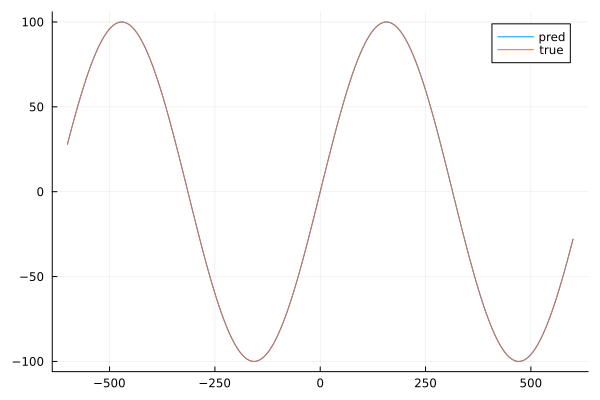

In [4]:
xs = reshape(range(-600, 600, length=1000), 1, :)
u_pred = pinn.phi(xs, res.u)
u_true = @. 100*sin(ω*xs)

using Plots
plot(vec(xs),vec(u_pred), label="pred")
plot!(vec(xs),vec(u_true), label="true")